# Part I - (Loan Data from Prosper)
## by (Esther Omoyiwola)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [9]:
loans = pd.read_csv("prosperLoanData.csv")
loans.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Necessary

> Looking at the data set, it is quite a big one and I would be creating a new data frame from the 'loans' data set which I would be working with in the course of this project. 

In [10]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [11]:
#creating a new data frame from the existing

new_loans = loans[['ListingCreationDate', 'LoanOriginalAmount','EmploymentStatus', 'IncomeRange', 'LoanMonthsSinceOrigination',
       'Term', 'LoanStatus', 'MonthlyLoanPayment', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'FirstRecordedCreditLine', 'IncomeVerifiable', 'StatedMonthlyIncome', 'ListingCategory (numeric)', 'IsBorrowerHomeowner']]

In [12]:
new_loans.head(5)

,ListingCreationDate,LoanOriginalAmount,EmploymentStatus,IncomeRange,LoanMonthsSinceOrigination,Term,LoanStatus,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,LenderYield,FirstRecordedCreditLine,IncomeVerifiable,StatedMonthlyIncome,ListingCategory (numeric),IsBorrowerHomeowner
0,2007-08-26 19:09:29.263000000,9425,Self-employed,"$25,000-49,999",78,36,Completed,330.43,0.16516,0.1580,0.1380,2001-10-11 00:00:00,True,3083.333333,0,True
1,2014-02-27 08:28:07.900000000,10000,Employed,"$50,000-74,999",0,36,Current,318.93,0.12016,0.0920,0.0820,1996-03-18 00:00:00,True,6125.000000,2,False
2,2007-01-05 15:00:47.090000000,3001,Not available,Not displayed,86,36,Completed,123.32,0.28269,0.2750,0.2400,2002-07-27 00:00:00,True,2083.333333,0,False
3,2012-10-22 11:02:35.010000000,10000,Employed,"$25,000-49,999",16,36,Current,321.45,0.12528,0.0974,0.0874,1983-02-28 00:00:00,True,2875.000000,16,True
4,2013-09-14 18:38:39.097000000,15000,Employed,"$100,000+",6,36,Current,563.97,0.24614,0.2085,0.1985,2004-02-20 00:00:00,True,9583.333333,2,True


In [13]:
print(new_loans.shape)
print(new_loans.dtypes)
print(new_loans.head(5))

(113937, 16)
ListingCreationDate            object
LoanOriginalAmount              int64
EmploymentStatus               object
IncomeRange                    object
LoanMonthsSinceOrigination      int64
Term                            int64
LoanStatus                     object
MonthlyLoanPayment            float64
BorrowerAPR                   float64
BorrowerRate                  float64
LenderYield                   float64
FirstRecordedCreditLine        object
IncomeVerifiable                 bool
StatedMonthlyIncome           float64
ListingCategory (numeric)       int64
IsBorrowerHomeowner              bool
dtype: object
             ListingCreationDate  LoanOriginalAmount EmploymentStatus  \
0  2007-08-26 19:09:29.263000000                9425    Self-employed   
1  2014-02-27 08:28:07.900000000               10000         Employed   
2  2007-01-05 15:00:47.090000000                3001    Not available   
3  2012-10-22 11:02:35.010000000               10000         Employed   


### What is the structure of your dataset?

> There are 113937 loans in the new_loansdataset with 15 features (ListingCreationDate, LoanOriginalAmount, EmploymentStatus, IncomeRange, LoanMonthsSinceOrigination, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, IsBorrowerHomeowner). 


### What is/are the main feature(s) of interest in your dataset?

> What factors affect a loan’s outcome status.

> What affects the borrower’s APR or interest rate.

> Are there differences between loans depending on how large the original loan amount was?

> Types of customers that repaid on time.

> Percentage of customers who are home owners to those who are not. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I have more than one main features of interest, so I think that almost all the features in this data set would help support my investigation. 

## Univariate Exploration

> Using the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Loan Original Amount Variable

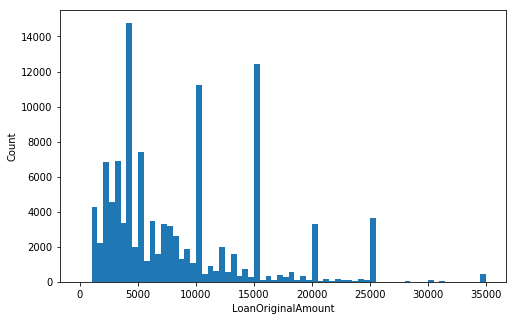

In [26]:
#variable of interest 
def hist_plotter(dataset,x,binsize = 500):
    bins = np.arange(0, dataset[x].max()+binsize, binsize)


    plt.figure(figsize=[8, 5])
    plt.hist(data = dataset, x = x, bins = bins)
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

hist_plotter(new_loans, 'LoanOriginalAmount',500)

Looking at the graph above, one can deduce that majority of people took loans in the range of 3000-5000 (Dollar). However, we have less people taking loan greater than 25000 (Dollar).

### EmploymentStatus Variable

In [ ]:
new_loans['EmploymentStatus'].unique()

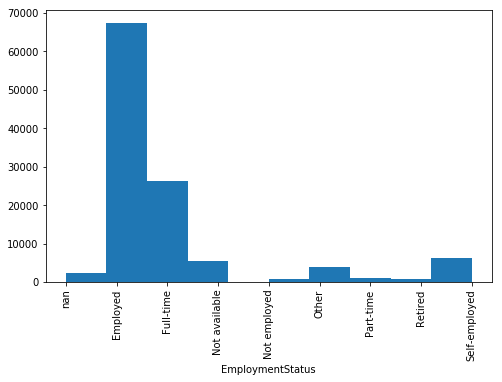

In [36]:

plt.figure(figsize=[8, 5])
plt.hist(data = new_loans, x = 'EmploymentStatus')
plt.xlabel('EmploymentStatus')
plt.xticks(rotation = 90)
plt.show()



In [ ]:
#replacing some variables 

new_loans['EmploymentStatus'] = new_loans['EmploymentStatus'].replace(['Self-employed','Full-time','Part-time'], 'Employed',)

plt.figure(figsize=[8, 5])
plt.hist(data = new_loans, x = 'EmploymentStatus')
plt.xlabel('EmploymentStatus')
plt.xticks(rotation = 90)
plt.show()

In the first 'employmentstatus' graph, there are statuses that could have just been generalised which are 'Self-employed','Full-time','Part-time', they could all pass under 'Employed' status. I had to replace the three strings with 'Employed' so that the visualization can be clearer to anyone looking at it.  

Greater percentage of people who applied for loan were employed at the time of application and a negligible amount of people didn't have any means of income at the time of application. 

### Term Variable

In [ ]:
#checking out how many unique variables are present in the variable before visualization

new_loans['Term'].unique()

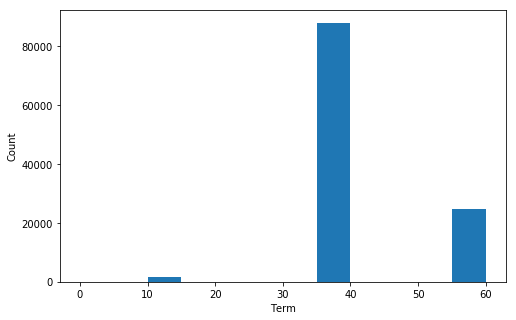

In [30]:
hist_plotter(new_loans, 'Term', 5)

Term is described as 'The length of the loan expressed in months'. It can be seen that a large number of persons went with 36 months for how long the loan would be active and a very small number went with 12 months while the rest number chose 60 months which is quite a long time, let say 5 years. 

### LoanStatus Variable

In [ ]:
#finding out all unique variables

new_loans['LoanStatus'].unique()

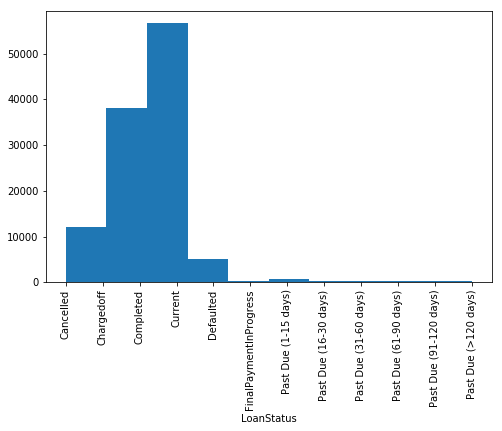

In [37]:
binsize = 0.002

plt.figure(figsize=[8, 5])
plt.hist(data = new_loans, x = 'LoanStatus', )
plt.xlabel('LoanStatus')
plt.xticks(rotation = 90)
plt.show()

In the above graph, very few people are owing after some days after while majority of the people tend to clear off their loans although we still have above 50,000 people and more currently on the loan. 

### IncomeRange Variable

In [ ]:
new_loans['IncomeRange'].unique()

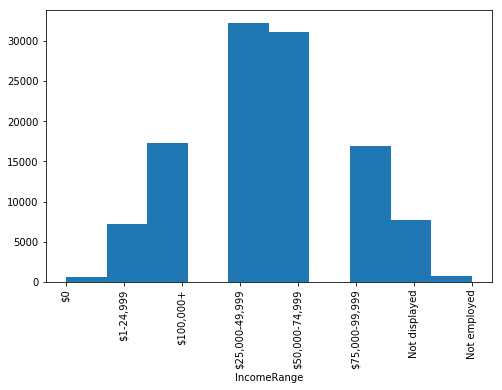

In [32]:
binsize = 0.005

plt.figure(figsize=[8, 5])
plt.hist(data = new_loans, x = 'IncomeRange')
plt.xlabel('IncomeRange')
plt.xticks(rotation = 90)
plt.show()

It can be deduced from the graph above that over 50% of the total number of those who took loan from prosper had an income range of $(25,000 - 74,999).

### BorrowerRate

In [ ]:
new_loans['BorrowerRate'].unique()
new_loans['BorrowerRate'].max()

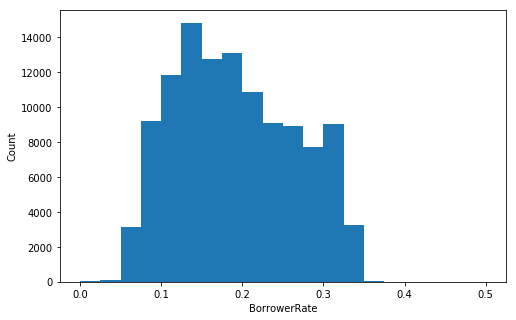

In [35]:
hist_plotter(new_loans, 'BorrowerRate', 0.025)

Most of the borrowers were charged at lower rate which goes from 0.1 to 0.25

### IsBorrowerHomeowner Variable

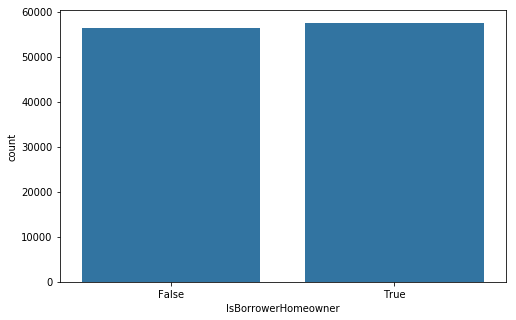

In [38]:
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = new_loans, x = 'IsBorrowerHomeowner', color = base_color)


There is no significant difference between homeowners and those who do not own a home. But then, the number of persons who own a home is slightly higher than those who do not. 

### ListingCategory Variable

In [ ]:
new_loans['ListingCategory (numeric)'].unique()

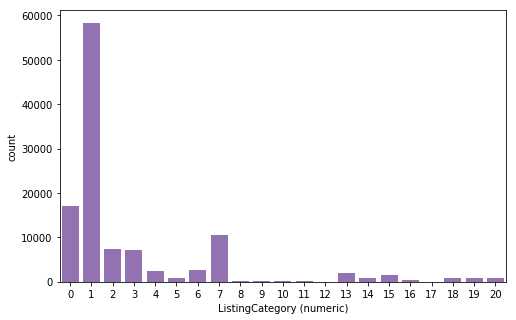

In [48]:


plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[4]
sb.countplot(data = new_loans, x = 'ListingCategory (numeric)', color = base_color)

I found out in this update that over 50% of the customers took a loan to repay oustanding loans which can be categorized as Loan consolidation. While some good numbers of them took loans for different things which are listed according to how high their numbers are; home improvements, business, engagement ring, vacations, taxes, etc

### DebtToIncomeRatio Variable

In [ ]:
new_loans['IncomeVerifiable'].unique()

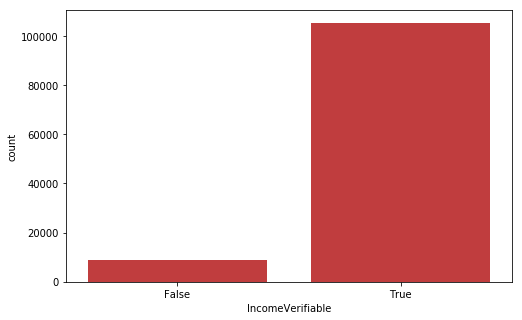

In [47]:
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[3]
sb.countplot(data = new_loans, x = 'IncomeVerifiable', color = base_color)

Incomeverifiable means the borrower indicated they have the required documentation to support their income. According to the graph above, over 80% of the clients of prosper certified the requirements while the rest couldn't provide documentation to support their income.  

### MonthlyLoanPayment Variable

In [ ]:
new_loans['MonthlyLoanPayment'].count()

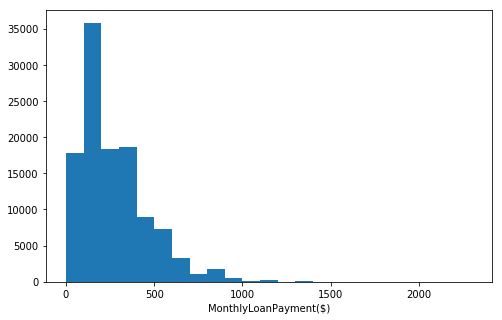

In [46]:

binsize = 100
bins = np.arange(0, new_loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('MonthlyLoanPayment($)')
plt.show()


According to the plot above, a lot of persons paid less than 500dollar  monthly for their loan payment while a low number of these customers paid above 1000dollar monthly. 

## Bivariate Exploration


##### Variables that I am looking at. 
Bivariate = Loan original amount, employment status, term, loan status, incomerange, borrower rate,
isborrowerhomeowner, listing category, Incomeverifiable, Monthlyloanpayment 

   ### IncomeRange and Term Variables

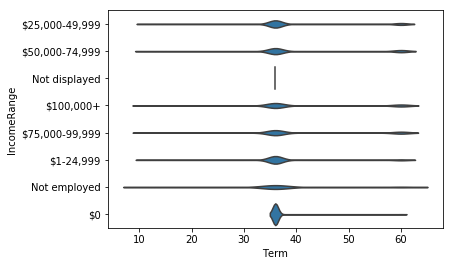

In [41]:
sb.violinplot(data= new_loans, y='IncomeRange', x='Term', color=base_color, inner=None);

I for once had the thought that one's income range affects the term chosen for loan repayment but according to the plot above, it doesn't. Looking at various ranges, customers vary in terms which doesn't depend on their income range. 

### IsBorrowerHomeowner and IncomeVerifiable Variables

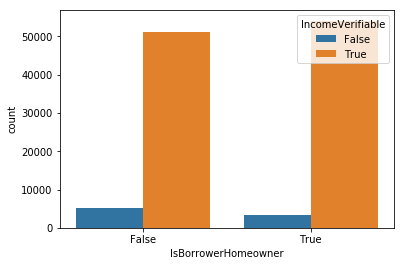

In [45]:
sb.countplot(data = new_loans, x = 'IsBorrowerHomeowner', hue = 'IncomeVerifiable')

The number of persons that are able to provide documentation to support their income is significantly higher than those who are unable. 

### LoanStatus and Term Variables

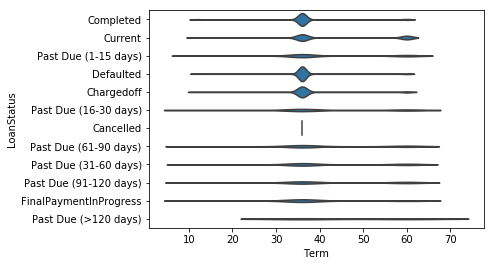

In [44]:
sb.violinplot(data= new_loans, y='LoanStatus', x='Term', color=base_color, inner=None);

### IncomeVerifiable and Term Variable

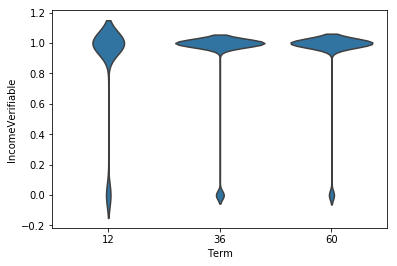

In [43]:
sb.violinplot(data= new_loans, y='IncomeVerifiable', x='Term', color=base_color, inner=None);

## Multivariate Exploration



### EmploymentStatus, BorrowerRate and IncomeVerifiable

([0, 1, 2, 3, 4, 5, 6, 7, -1.0], <a list of 9 Text xticklabel objects>)

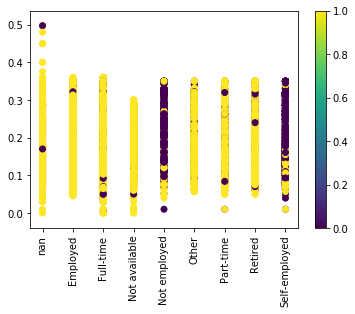

In [42]:
plt.scatter(data = new_loans, x = 'EmploymentStatus', y = 'BorrowerRate', c = 'IncomeVerifiable')
plt.colorbar()
plt.xticks(rotation = 90)

In [ ]:
new_loans.info()

# Conclusions

> This Dataset called 'Loan By Prosper' was a thorough work through as it had a lot of variables with over 100,000 rows to be analyzed visually. These are the notes to be taken about my insights in the wrangling and visuals. 

- Initially, the dataset had 81 variables (columns) and 113937 rows, working with all these variables might be a little intense so I decided to work with 16 important variables that would tell us more about the data and also be able to question it for more insight. 



- Looking at the number of rows, one could tell that 'Loan by Prosper' had lot of customers that took loans and had different statuses. A lot of persons took loan between the range of 500 - 15,000 (dollars) and over 70% of the customers are employed; some employments are in form of full-time, part-time and self-employed. 


- 60% of Prosper's clients chose 36 months as their loan repayment term.


- Over 50% of the customers still have active loans, over 20% had their loan payment completed and just a little amount of people had past due statuses. Also looking at customers that have their own houses, close to 50% didn't own. 


- Finally, I found out that the interests payment rates differe for all customers and there are some factors that affected the rates, they are; loan amount, term for repayment and monthly loan payment. 
 
 
